## **Introduction**

As part of the best neighborhood for a kid to grow up in, one of the metrics we had to look at was enrollment in schools. We decided to look at enrollment in schools by neighborhood, as we decided a neighborhood with more children enrolled in schools would be "better." 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
neighborhoodEnroll = pd.read_csv("neighborhood_enrollment.csv")


neighborhoodEnroll = neighborhoodEnroll.iloc[:, [0,8]]
neighborhoodEnroll = neighborhoodEnroll.dropna()
print(neighborhoodEnroll)

            neighborhood  total_students_enrolled
6      Bedford Dwellings                     12.0
7              Beechview                     44.0
9             Bloomfield                     21.0
12      Brighton Heights                     32.0
13             Brookline                     57.0
..                   ...                      ...
354  Upper Lawrenceville                     24.0
356         West Oakland                     14.0
357             Westwood                     62.0
358  Wilkinsburg Borough                    194.0
359              Windgap                     31.0

[268 rows x 2 columns]


{'Bedford Dwellings': 220, 'Beechview': 794, 'Bloomfield': 261, 'Brighton Heights': 598, 'Brookline': 1169, 'Carrick': 1276, 'Central Northside': 150, 'Crafton Heights': 539, 'Crawford-Roberts': 228, 'East Hills': 569, 'East Liberty': 496, 'Elliott': 229, 'Fineview': 97, 'Garfield': 520, 'Greenfield': 487, 'Highland Park': 412, 'Homewood North': 589, 'Homewood South': 477, 'Homewood West': 118, 'Knoxville': 616, 'Larimer': 256, 'Lincoln-Lemington-Belmar': 508, 'Manchester': 162, 'Marshall-Shadeland': 467, 'Middle Hill': 228, 'Morningside': 179, 'Mt. Oliver Borough': 479, 'Northview Heights': 527, 'Perry North': 397, 'Perry South': 443, 'Point Breeze': 317, 'Shadyside': 217, 'Sheraden': 694, 'Spring Hill-City View': 239, 'Squirrel Hill South': 679, 'Stanton Heights': 332, 'Terrace Village': 401, 'Upper Lawrenceville': 112, 'Westwood': 269, 'Windgap': 110, 'Allegheny Center': 80, 'Allentown': 284, 'Arlington': 183, 'Arlington Heights': 21, 'Banksville': 170, 'Beltzhoover': 245, 'Bluff': 

Text(0.5, 1.0, 'Number of Kids Enrolled in School by Neighborhood')

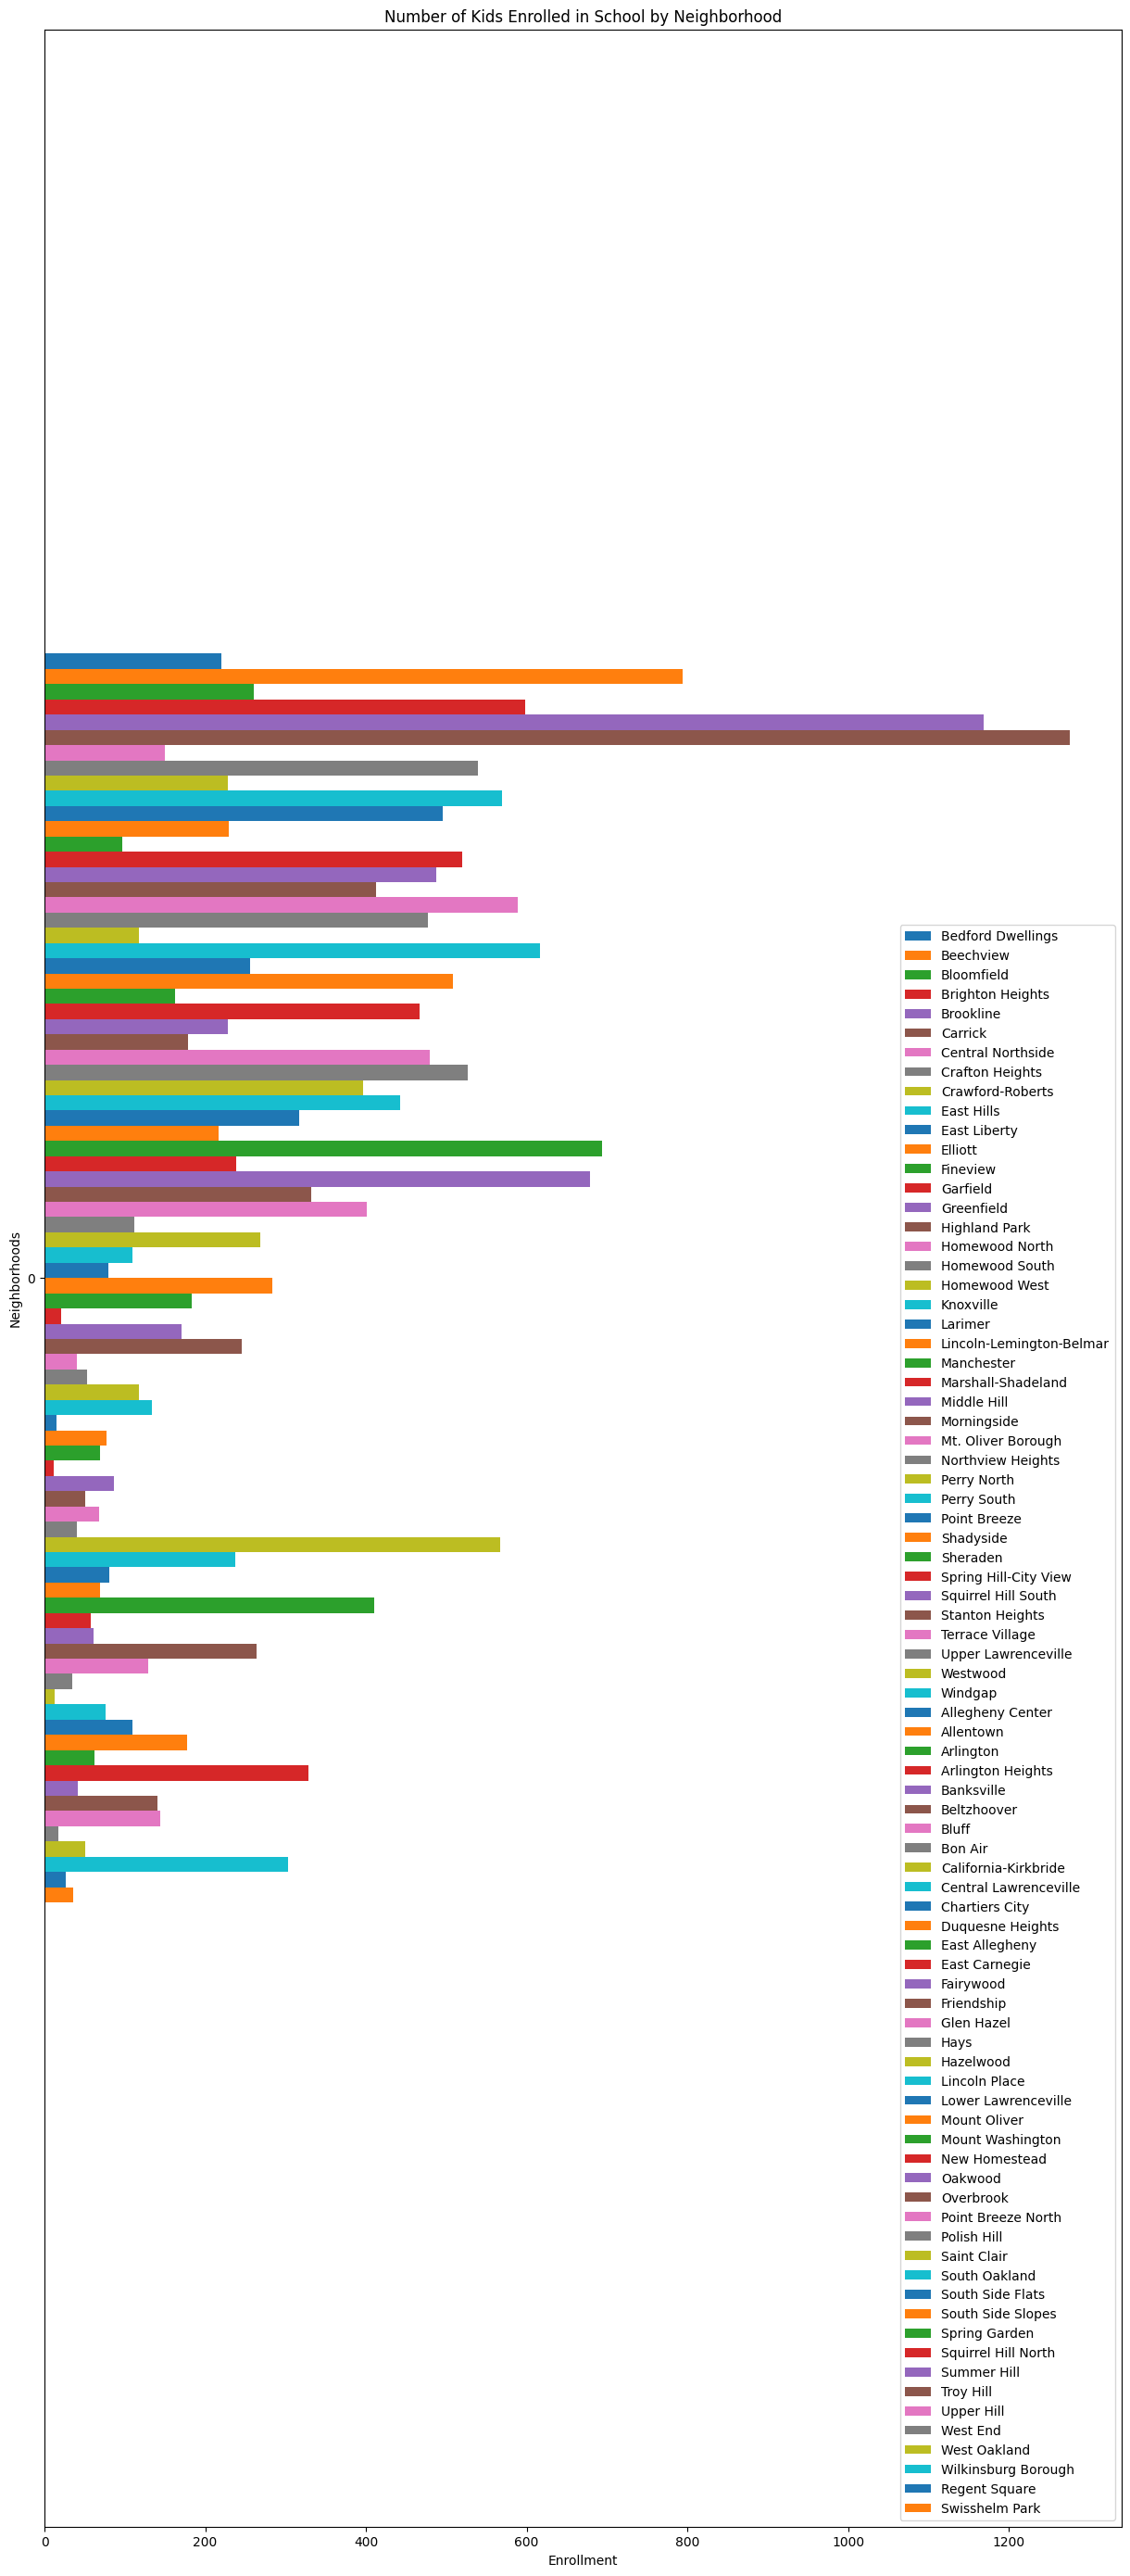

In [3]:
kidsSchools = {} # Make Dictionary
df = pd.DataFrame(neighborhoodEnroll)
for index, row in df.iterrows():
    try:
        kidsSchools[row['neighborhood']] += int(row['total_students_enrolled'])
    except:
        kidsSchools[row['neighborhood']] = int(row['total_students_enrolled'])

print(kidsSchools)

data = pd.DataFrame(kidsSchools, index=[0])
ax = data.plot.barh(rot=0, figsize=(15,35))
ax.set_xlabel('Enrollment')
ax.set_ylabel('Neighborhoods')
ax.invert_yaxis()
plt.title('Number of Kids Enrolled in School by Neighborhood')

Text(0, 0.5, 'Neighborhood')

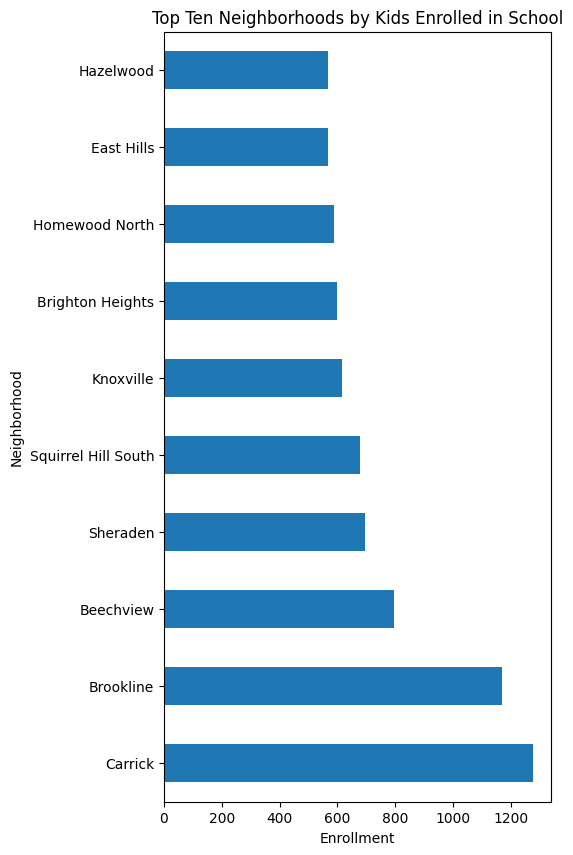

In [4]:
topTen = data.max().nlargest(10)
topTen.plot.barh(rot=0, figsize=(5,10))
plt.title('Top Ten Neighborhoods by Kids Enrolled in School')
plt.xlabel('Enrollment')
plt.ylabel('Neighborhood')

Text(0, 0.5, 'Neighborhood')

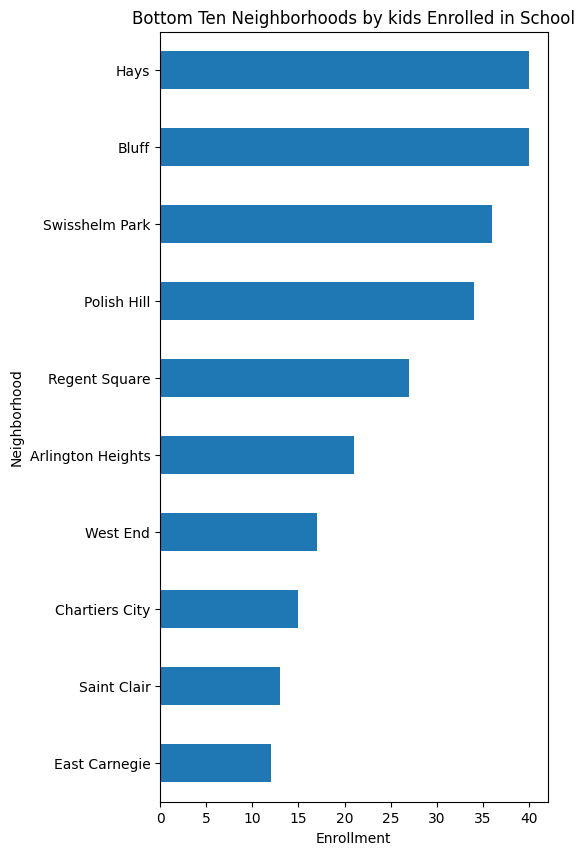

In [5]:
bottomTen = data.min().nsmallest(10)
bottomTen.plot.barh(rot=0, figsize=(5,10))
plt.title('Bottom Ten Neighborhoods by kids Enrolled in School')
plt.xlabel('Enrollment')
plt.ylabel('Neighborhood')

In [6]:
import pandas as pd
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file('Neighborhoods_.shp')

In [7]:
school_enroll = neighborhoodEnroll.groupby('neighborhood').sum()['total_students_enrolled']
school_enroll.sort_values(ascending=False)

schools_map = neighborhoods.merge(school_enroll, how='left', left_on='hood', right_on='neighborhood')
schools_map[['hood','total_students_enrolled']].head()

,hood,total_students_enrolled
0,Point Breeze North,129.0
1,Squirrel Hill North,328.0
2,Garfield,520.0
3,Bedford Dwellings,220.0
4,Knoxville,616.0


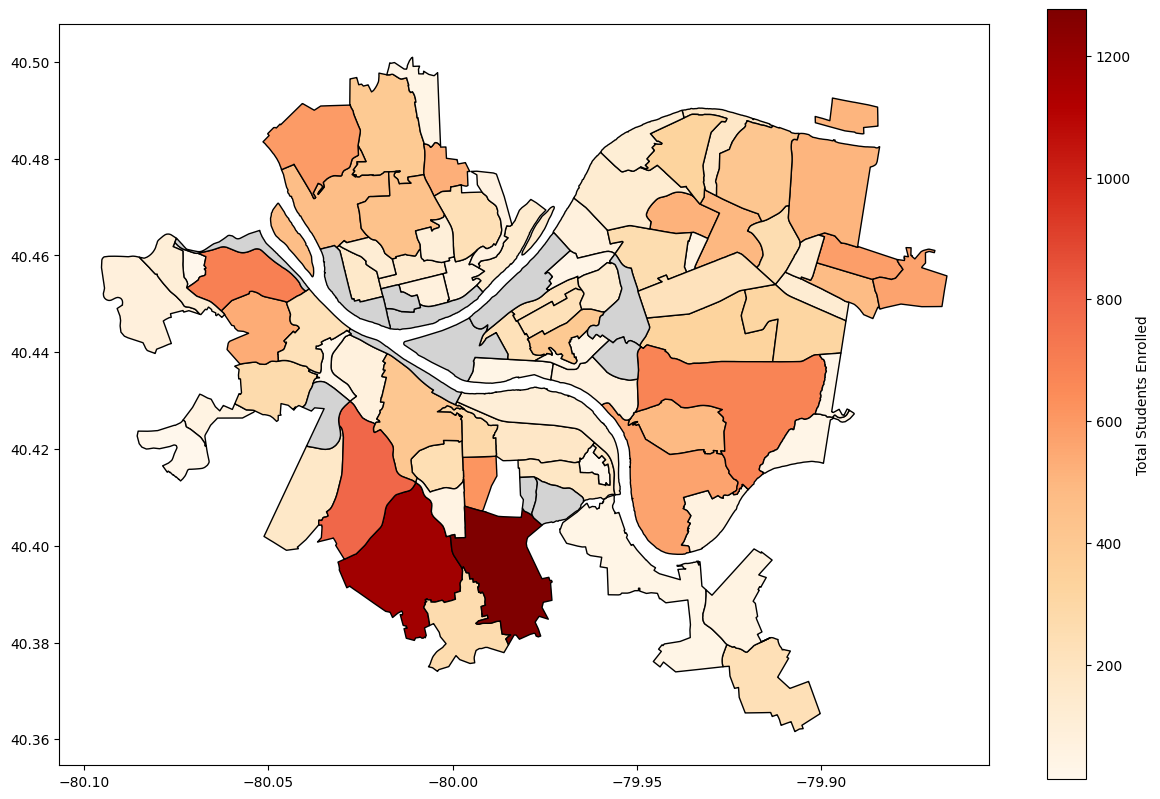

In [8]:
schools_map.plot(column='total_students_enrolled', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Total Students Enrolled"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [9]:
populations = pd.read_csv("population-density.csv")
populations = populations.iloc[:, [0,9]]
df = pd.DataFrame(populations)
print(df)

pop_data = df.set_index('Neighborhood').T.to_dict('records')[0]
for key in pop_data:
    pop_data[key] = pop_data[key].replace(',', '')

print(pop_data)

           Neighborhood Pop. 2010
0      Allegheny Center       933
1        Allegheny West       462
2             Allentown     2,500
3             Arlington     1,869
4     Arlington Heights       244
..                  ...       ...
85  Upper Lawrenceville     2,669
86             West End       254
87         West Oakland     2,604
88             Westwood     3,066
89              Windgap     1,369

[90 rows x 2 columns]
{'Allegheny Center': '933', 'Allegheny West': '462', 'Allentown': '2500', 'Arlington': '1869', 'Arlington Heights': '244', 'Banksville': '4144', 'Bedford Dwellings': '1202', 'Beechview': '7974', 'Beltzhoover': '1925', 'Bloomfield': '8442', 'Bluff': '6600', 'Bon Air': '808', 'Brighton Heights': '7247', 'Brookline': '13214', 'California-Kirkbride': '761', 'Carrick': '10113', 'Central Business District': '3629', 'Central Lawrenceville': '4482', 'Central Northside': '2923', 'Central Oakland': '6086', 'Chartiers City': '477', 'Chateau': '11', 'Crafton Heights': '3814'

In [10]:
school_percents = {}
for key in pop_data:
    if key in pop_data and key in kidsSchools:
        school_percents[key] = (kidsSchools[key] / int(pop_data[key])) * 100

print(school_percents)

{'Allegheny Center': 8.57449088960343, 'Allentown': 11.360000000000001, 'Arlington': 9.791332263242374, 'Arlington Heights': 8.60655737704918, 'Banksville': 4.102316602316602, 'Bedford Dwellings': 18.302828618968388, 'Beechview': 9.957361424630047, 'Beltzhoover': 12.727272727272727, 'Bloomfield': 3.091684434968017, 'Bluff': 0.6060606060606061, 'Bon Air': 6.5594059405940595, 'Brighton Heights': 8.2516903546295, 'Brookline': 8.846677766005753, 'California-Kirkbride': 15.374507227332456, 'Carrick': 12.617423118758033, 'Central Lawrenceville': 2.989736724676484, 'Central Northside': 5.131713992473486, 'Chartiers City': 3.1446540880503147, 'Crafton Heights': 14.132144729942317, 'Crawford-Roberts': 10.106382978723403, 'Duquesne Heights': 3.175257731958763, 'East Allegheny': 3.2303370786516856, 'East Carnegie': 2.1052631578947367, 'East Hills': 17.95519091195961, 'East Liberty': 8.451184188107003, 'Elliott': 9.617807643847124, 'Fairywood': 8.582834331337326, 'Fineview': 7.54863813229572, 'Fri

Text(0, 0.5, 'Neighborhood')

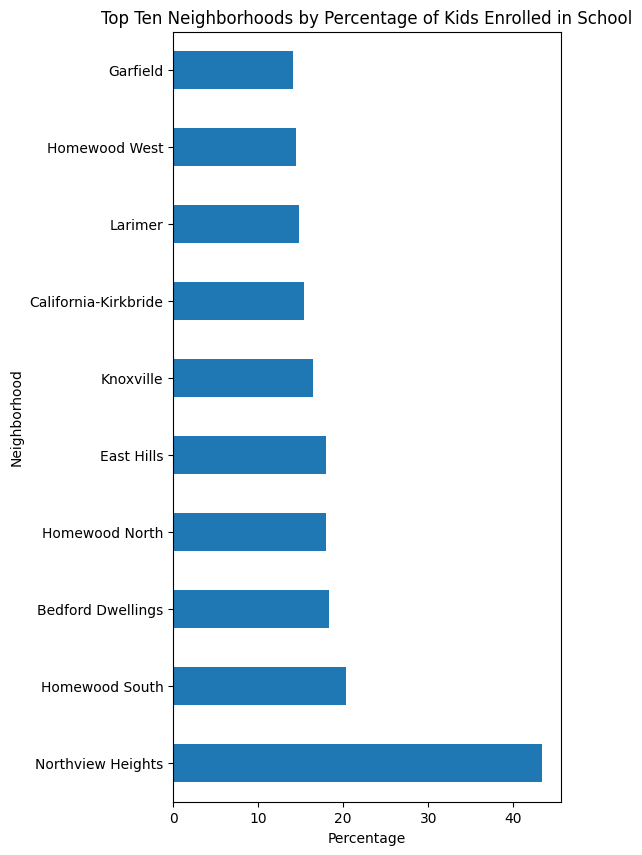

In [11]:
s = pd.DataFrame(school_percents, index=[0])
topTenPers = s.max().nlargest(10)
topTenPers.plot.barh(rot=0, figsize=(5,10))
plt.title('Top Ten Neighborhoods by Percentage of Kids Enrolled in School')
plt.xlabel('Percentage')
plt.ylabel('Neighborhood')

In [12]:
school_series = pd.DataFrame(school_percents.items(), columns=['Neighborhood', 'Percent'])
school_percentages = school_series.groupby('Neighborhood').sum()['Percent']
s = school_percentages.sort_values(ascending=False)
print(s)

percentages_map = neighborhoods.merge(school_percentages, how='left', left_on='hood', right_on='Neighborhood')
percentages_map[['hood','Percent']].head()

Neighborhood
Northview Heights    43.410214
Homewood South       20.349829
Bedford Dwellings    18.302829
Homewood North       17.957317
East Hills           17.955191
                       ...    
East Carnegie         2.105263
West Oakland          1.958525
South Side Flats      1.652266
Shadyside             1.559468
Bluff                 0.606061
Name: Percent, Length: 78, dtype: float64


,hood,Percent
0,Point Breeze North,6.280428
1,Squirrel Hill North,2.886562
2,Garfield,14.149660
3,Bedford Dwellings,18.302829
4,Knoxville,16.439819


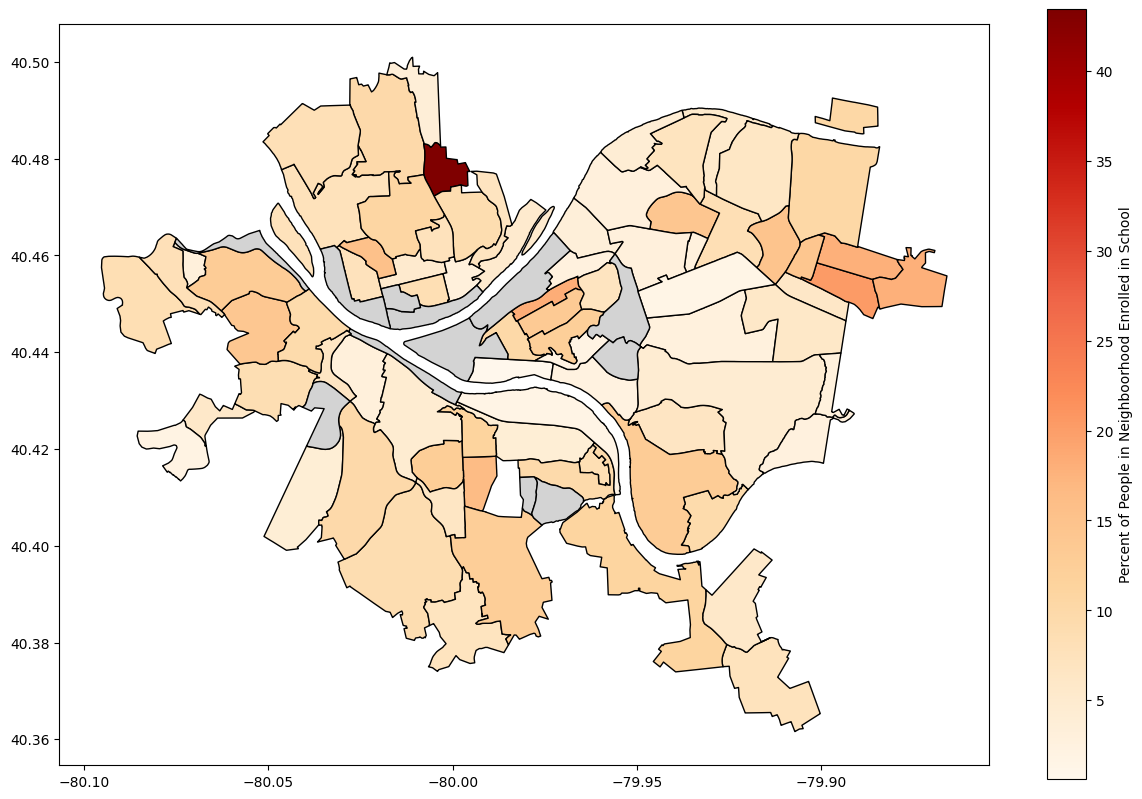

In [13]:
percentages_map.plot(column='Percent', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Percent of People in Neighboorhood Enrolled in School"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )